# Test 데이터 전처리

In [30]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [31]:
#각 kw(모터) 값을 불러옵니다. 

#bearing의 kw 값 로드
bea=[2.2,3.7,5.5,7.5,11,15,18.5]
#belt의 kw 값 로드
bel=[2.2,5.5,7.5,11,15,18.5,22,55]

#misalignment의 kw값 로드 - 이때, Current의 misalignment kw는 cumis로, Kimm&Vibration의 kw는 (값이 같으므로) vikimis로 로드
cumis=[2.2,3.7,5.5,7.5,11,22,30,37]
vikimis=[2.2,3.7,3.75,5.5,7.5,11,22,30,37]

#unbalance의 kw값 로드 - 이때, Current&Kimm의 kw는 (값이 같으므로) cukiunb로, Vibration의 kw는 viunb로 로드
cukiunb=[2.2,3.7,5.5,11,15,22,55]
viunb=[2.2,5.5,7.5,11,15,22,55]

num=['a','b','c','d','e','f','g','h','i']

In [32]:
# 진동/전류 구분 & label 값에 따른 kw값을 할당해주는 함수를 만듭니다.

def kw_result(kind,label):
    if label == 'bearing': kww=bea
    elif label == 'belt': kww=bel
    elif kind=='current(전류)' and label=='misalignment': kww=cumis
    elif kind!='current(전류)' and label=='misalignment': kww=vikimis
    elif kind=='vibration(무선진동)' and label=='unbalance': kww=viunb
    elif kind!='vibration(무선진동)' and label=='unbalance': kww=cukiunb
    return kww

In [33]:
# 각 csv 파일의 경로를 불러오는 함수를 만듭니다.

def link(kww,label,op_or_no,kind):
    a=np.array(glob.glob('daejeon_data/'+str(kind)+'/'+str(label)+'_'+str(kww)+'kw_*/*/*'+str(op_or_no)+'-csv/*.csv'))
    return a

In [34]:
# 각 csv 파일을 DataFrame 형태로 각각 저장하는 함수를 만듭니다.

def file_link(kind,label,op_or_no):
    kww=kw_result(kind,label)
    for i,n in zip(kww,num):
        globals()['df_{}'.format(n)]=link(i,label,op_or_no,kind)

In [35]:
# Current(전류) 데이터 중 특정 label에 해당하는 DF들을 출력하여 하나의 DF로 합친 후, 전처리를 진행하는 함수를 만듭니다.

def CurrentDf(kind,label,op_or_no):
    kww=kw_result(kind,label)
    file_link(kind,label,op_or_no)
    for n,a in zip(num, range(0,len(kww))):
        df= pd.concat([pd.read_csv(i,header=14,names=['R_Current','S_Current','T_Current','drop'],usecols=['R_Current','S_Current','T_Current']) for i in globals()['df_{}'.format(n)]]).reset_index(drop=True)
        df['kw']=kww[a]
        df['op_or_no']=op_or_no
        globals()[str(kind)[:2]+'DF_'+str(label)[:3]+'_'+str(op_or_no)+'_{}'.format(n)]=df

In [36]:
# Kimm(유선진동) 데이터 중 특정 label에 해당하는 DF들을 출력하여 하나의 DF로 합친 후, 전처리를 진행하는 함수를 만듭니다.
def KimmDf(kind,label,op_or_no):
    kww=kw_result(kind,label)
    file_link(kind,label,op_or_no)
    for n,a in zip(num, range(0,len(kww))):
        df= pd.concat([pd.read_csv(i,header=3,names=['Kimm','drop'],usecols=['Kimm']) for i in globals()['df_{}'.format(n)]]).reset_index(drop=True)
        df['kw']=kww[a]
        df['op_or_no']=op_or_no
        globals()[str(kind)[:2]+'DF_'+str(label)[:3]+'_'+str(op_or_no)+'_{}'.format(n)]=df

In [37]:
# Vibration(무선진동) 데이터 중 특정 label에 해당하는 DF들을 출력하여 하나의 DF로 합친 후, 전처리를 진행하는 함수를 만듭니다.

def VibrationDf(kind,label,op_or_no):
    kww=kw_result(kind,label)
    file_link(kind,label,op_or_no)
    for n,a in zip(num, range(0,len(kww))):
        df= pd.concat([pd.read_csv(i,header=3,names=['Vibration','dropp'],usecols=['Vibration']) for i in globals()['df_{}'.format(n)]]).reset_index(drop=True)
        df['kw']=kww[a]
        df['op_or_no']=op_or_no
        globals()[str(kind)[:2]+'DF_'+str(label)[:3]+'_'+str(op_or_no)+'_{}'.format(n)]=df

In [39]:
# 위 만든 함수들을 한꺼번에 수행할 수 있도록, 조건에 맞게 API를 사용하는 함수를 만듭니다.

def multi(kind,label,op_or_no):
    kww=kw_result(kind,label)
    if kind == 'current(전류)': CurrentDf(kind,label,op_or_no)
    elif kind =='kimm(유선진동)': KimmDf(kind,label,op_or_no)
    else : VibrationDf(kind,label,op_or_no)

In [40]:
# 데이터프레임을 kind와 label 별로 합치는 함수를 만듭니다.

def con(kind,label):
    df_1= pd.concat([globals()[str(kind)[:2]+'DF_'+str(label)[:3]+'_op_{}'.format(n)] for n in num[:len(kw_result(kind,label))]])
    df_2= pd.concat([globals()[str(kind)[:2]+'DF_'+str(label)[:3]+'_no_{}'.format(n)] for n in num[:len(kw_result(kind,label))]])
    df = pd.concat([df_1,df_2])
    return df

In [41]:
# for 문을  활용해 조건 별로 multi 함수(위 만든 함수들을 한꺼번에 수행할 수 있도록, 조건에 맞게 API를 사용하는 함수)를 실행합니다.
for a in ['current(전류)','kimm(유선진동)','vibration(무선진동)']:
    for b in ['bearing','belt','misalignment','unbalance']:
        for c in ['op','no']:
            multi(a,b,c)

In [42]:
# for 문을 활용해 con 함수(데이터프레임을 kind와 label 별로 합치는 함수)를 실행합니다.
for a in ['current(전류)','kimm(유선진동)','vibration(무선진동)']:
    for b in ['bearing','belt','misalignment','unbalance']:
        globals()['DF_'+str(a)[:2]+str(b)[:3]]=con(a,b)

# Train 데이터 전처리

### Submission_Commit CSV 파일 처리

In [53]:
Submission_Commit=pd.read_csv('dataSet_Submission_Re/Submission_Commit.csv')

In [56]:
# zfill을 활용해, 타 Test 데이터의 명칭처럼 변경해줍니다.
Submission_Commit['File_name']=Submission_Commit['File_name'].astype(str).str.zfill(3)
Submission_Commit

,File_name,Category,Motor,Label
0,001,Kimm,15.0,NaN
1,002,Kimm,15.0,NaN
2,003,Vibration,7.5,NaN
3,004,Current,5.5,NaN
4,005,Vibration,11.0,NaN
...,...,...,...,...
146,146,Current,5.5,NaN
147,147,Current,55.0,NaN
148,148,Vibration,15.0,NaN
149,149,Kimm,18.5,NaN


### Current 파일 처리

In [291]:
# 카테고리가 Current(전류)인 데이터들의 파일 링크를 불러옵니다.
Current_test_links=[]
Current_test_numbers = Submission_Commit[Submission_Commit['Category']=='Current']['File_name'].values
Current_test_mot = Submission_Commit[Submission_Commit['Category']=='Current']['Motor'].values

for i in Current_test_numbers:
    a = glob.glob('dataSet_Submission_Re/'+str(i)+'.csv')
    a = str(a).replace("[", "").replace("]","").replace("'","")
    Current_test_links.append(a)

In [292]:
# Current 에 해당하는 Test 데이터의 셋을 데이터프레임화 합니다.
for i in range(0,len(Current_test_links)):
    df=pd.read_csv(Current_test_links[i],names=['s','R_Current','S_Current','T_Current'],skiprows=1 )
    df['kw']=pd.to_numeric(Current_test_mot[i])
    df['File_name']=pd.to_numeric(Current_test_numbers[i])
    df.drop(['s'],axis=1,inplace=True)
    globals()['df_{}'.format(i)]=df

In [353]:
Current_test= pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19,df_20,df_21,df_22,df_23,df_24,df_25,df_26,df_27,df_28,df_29,df_30,df_31,df_32,df_33,df_34,df_35,df_36,df_37,df_38,df_39,df_40,df_41,df_42,df_43,df_44,df_45,df_46,df_47,df_48,df_49]).reset_index(drop=True)
Current_test['File_name']=Current_test['File_name'].astype(str).str.zfill(3)

In [358]:
Current_test

,File_name,R_Current,S_Current,T_Current,kw,value
0,001,NaN,NaN,NaN,15.0,0.072470
1,001,NaN,NaN,NaN,15.0,0.148405
2,001,NaN,NaN,NaN,15.0,-0.005984
3,001,NaN,NaN,NaN,15.0,0.080193
4,001,NaN,NaN,NaN,15.0,-0.012642
...,...,...,...,...,...,...
2995,150,7.532349,-19.093628,10.895630,7.5,NaN
2996,150,0.965942,-17.371948,15.620239,7.5,NaN
2997,150,-4.919800,-14.409058,18.422974,7.5,NaN
2998,150,-12.687378,-6.120972,17.862427,7.5,NaN


In [178]:
# 카테고리가 Kimm(유선진동)인 데이터들의 파일 링크를 불러옵니다.
Kimm_test_links=[]
Kimm_test_numbers = Submission_Commit[Submission_Commit['Category']=='Kimm']['File_name'].values
Kimm_test_mot = Submission_Commit[Submission_Commit['Category']=='Kimm']['Motor'].values

for i in Kimm_test_numbers:
    a = glob.glob('dataSet_Submission_Re/'+str(i)+'.csv')
    a = str(a).replace("[", "").replace("]","").replace("'","")
    Kimm_test_links.append(a)

In [348]:
# Kimm 에 해당하는 Test 데이터의 셋을 데이터프레임화 합니다.
for i in range(0,len(Kimm_test_links)):
    df=pd.read_csv(Kimm_test_links[i],names=['s','value'],skiprows=1 )
    df['kw']=pd.to_numeric(Kimm_test_mot[i])
    df['File_name']=pd.to_numeric(Kimm_test_numbers[i])
    df.drop(['s'],axis=1,inplace=True)
    globals()['df_{}'.format(i)]=df

In [350]:
Kimm_test= pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19,df_20,df_21,df_22,df_23,df_24,df_25,df_26,df_27,df_28,df_29,df_30,df_31,df_32,df_33,df_34,df_35,df_36,df_37,df_38,df_39,df_40,df_41,df_42,df_43,df_44]).reset_index(drop=True)
Kimm_test['File_name']=Kimm_test['File_name'].astype(str).str.zfill(3)

In [194]:
# 카테고리가 Vibration(무선진동)인 데이터들의 파일 링크를 불러옵니다.
Vibration_test_links=[]
Vibration_test_numbers = Submission_Commit[Submission_Commit['Category']=='Vibration']['File_name'].values
Vibration_test_mot = Submission_Commit[Submission_Commit['Category']=='Vibration']['Motor'].values

for i in Vibration_test_numbers:
    a = glob.glob('dataSet_Submission_Re/'+str(i)+'.csv')
    a = str(a).replace("[", "").replace("]","").replace("'","")
    Vibration_test_links.append(a)

In [369]:
# Vibration 에 해당하는 Test 데이터의 셋을 데이터프레임화 합니다.
for i in range(0,len(Vibration_test_links)):
    df=pd.read_csv(Vibration_test_links[i],names=['s','value'],skiprows=1 )
    df['kw']=pd.to_numeric(Vibration_test_mot[i])
    df['File_name']=pd.to_numeric(Vibration_test_numbers[i])
    df.drop(['s'],axis=1,inplace=True)
    globals()['df_{}'.format(i)]=df

In [371]:
Vibration_test= pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19,df_20,df_21,df_22,df_23,df_24,df_25,df_26,df_27,df_28,df_29,df_30,df_31,df_32,df_33,df_34,df_35,df_36,df_37,df_38,df_39,df_40,df_41,df_42,df_43,df_44,df_45,df_46,df_47,df_48,df_49,df_50,df_51,df_52,df_53,df_54,df_55]).reset_index(drop=True)
Vibration_test['File_name']=Vibration_test['File_name'].astype(str).str.zfill(3)

# Current 데이터

### Current(전류) 데이터 전처리

In [201]:
# 각 label 명을 지정합니다.
DF_cubea['Label']='bearing'
DF_cubel['Label']='belt'
DF_cumis['Label']='misalignment'
DF_cuunb['Label']='unbalance'

In [46]:
# label 별로 나뉘어져 있는 데이터 프레임을 하나의 DF_Current 프레임으로 합칩니다.
DF_Current = pd.concat([DF_cubea,DF_cubel,DF_cumis,DF_cuunb]).reset_index(drop=True)

In [47]:
#타겟값(목표값)을 형성합니다.
DF_Current['Target']=DF_Current['Label']
DF_Current.loc[(DF_Current.op_or_no=='op'),'Target']='normal'
DF_Current

,R_Current,S_Current,T_Current,kw,op_or_no,Label,Target
0,-3.868774,3.978882,-0.745728,2.2,op,bearing,normal
1,-4.229126,3.778687,-0.145142,2.2,op,bearing,normal
2,-4.189087,2.737671,0.975952,2.2,op,bearing,normal
3,-4.389282,2.257202,1.696655,2.2,op,bearing,normal
4,-4.349243,1.456421,2.617554,2.2,op,bearing,normal
...,...,...,...,...,...,...,...
2303995,-0.280273,-0.280273,-0.240234,55.0,no,unbalance,unbalance
2303996,-0.280273,-0.200195,-0.200195,55.0,no,unbalance,unbalance
2303997,-0.280273,-0.200195,-0.200195,55.0,no,unbalance,unbalance
2303998,-0.280273,-0.200195,-0.200195,55.0,no,unbalance,unbalance


In [48]:
# label값, op_or_no값에 대해 인코딩을 합니다. 또한 목표값이 될 label값을 Target으로 지정합니다.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le = le.fit(DF_Current['op_or_no'])
DF_Current['op_or_no'] = le.transform(DF_Current['op_or_no'])

le = le.fit(DF_Current['Target'])
DF_Current['Target'] = le.transform(DF_Current['Target'])

DF_Current=pd.get_dummies(DF_Current)

In [49]:
# 인코딩한 label값이 각각 무엇을 의미하는지 확인합니다.
le.classes_
le.inverse_transform([0,1,2,3,4])

array(['bearing', 'belt', 'misalignment', 'normal', 'unbalance'],
      dtype=object)

In [50]:
# 데이터의 분포를 확인합니다.
print(DF_Current['Target'].value_counts())
print(DF_Current['op_or_no'].value_counts())

3    1152000
2     324000
1     324000
4     252000
0     252000
Name: Target, dtype: int64
1    1152000
0    1152000
Name: op_or_no, dtype: int64


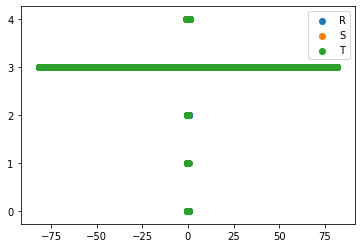

In [21]:
# 데이터의 분포를 확인합니다.
plt.scatter(DF_Current['R_Current'],DF_Current['Target'],label='R')
plt.scatter(DF_Current['S_Current'],DF_Current['Target'],label='S')
plt.scatter(DF_Current['T_Current'],DF_Current['Target'],label='T')
plt.legend()

In [202]:
# 랜덤하게 Train, Validation 데이터를 7:3 비율로 나눕니다.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

X_df = DF_Current.drop(['Target','Label_bearing','Label_belt','Label_misalignment','Label_unbalance','op_or_no'],axis=1)
y_df = DF_Current['Target']
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.3)

In [204]:
# random forest를 이용해 모델링합니다
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train , y_train)

NameError: name 'y_test' is not defined

In [205]:
pred = rf_clf.predict(X_val)
accuracy = accuracy_score(y_val , pred)
print('정확도: {0:.4f}'.format(accuracy))

정확도: 0.9964


## Current(전류) 테스트

In [295]:
pred = rf_clf.predict(Current_test.drop(['File_name'],axis=1))
Current_test['Target']=pd.DataFrame(pred)
Current_test.head(2)

,R_Current,S_Current,T_Current,kw,File_name,Target
0,0.120117,-0.280273,0.0,5.5,004,1
1,0.120117,-0.280273,0.0,5.5,004,1


In [298]:
Current_test['File_name'].unique()
for i,n in zip(range(0,len(Current_test['File_name'].unique())),Current_test['File_name'].unique()):
    print(n, le.inverse_transform([Current_test[Current_test['File_name']==n]['Target'].mode()]))

004 ['belt']
006 ['normal']
013 ['normal']
017 ['misalignment']
022 ['bearing']
031 ['normal']
034 ['unbalance']
035 ['misalignment']
037 ['belt']
040 ['misalignment']
042 ['belt']
047 ['normal']
050 ['misalignment']
055 ['misalignment']
060 ['unbalance']
061 ['belt']
065 ['misalignment']
067 ['unbalance']
068 ['unbalance']
075 ['unbalance']
076 ['misalignment']
078 ['belt']
080 ['belt']
081 ['belt']
087 ['belt']
089 ['unbalance']
093 ['bearing']
095 ['misalignment']
097 ['normal']
098 ['unbalance']
101 ['normal']
103 ['normal']
105 ['normal']
107 ['normal']
111 ['normal']
112 ['normal']
115 ['normal']
116 ['normal']
118 ['normal']
121 ['normal']
124 ['normal']
126 ['normal']
136 ['normal']
138 ['normal']
139 ['normal']
145 ['normal']
146 ['normal']
147 ['normal']
150 ['normal']


## Kimm(유선진동) 데이터 전처리

In [299]:
# 각 label 명을 지정합니다.
DF_kibea['Label']='bearing'
DF_kibel['Label']='belt'
DF_kimis['Label']='misalignment'
DF_kiunb['Label']='unbalance'

In [300]:
# label 별로 나뉘어져 있는 데이터 프레임을 하나의 DF_Current 프레임으로 합칩니다.
DF_Kimm = pd.concat([DF_kibea,DF_kibel,DF_kimis,DF_kiunb]).reset_index(drop=True)

In [301]:
#타겟값(목표값)을 형성합니다.
DF_Kimm['Target']=DF_Kimm['Label']
DF_Kimm.loc[(DF_Kimm.op_or_no=='op'),'Target']='normal'
DF_Kimm

,Kimm,kw,op_or_no,Label,Target
0,-0.006109,2.2,op,bearing,normal
1,0.000533,2.2,op,bearing,normal
2,0.002906,2.2,op,bearing,normal
3,-0.001557,2.2,op,bearing,normal
4,-0.001890,2.2,op,bearing,normal
...,...,...,...,...,...
4607995,0.006238,55.0,no,unbalance,unbalance
4607996,-0.003397,55.0,no,unbalance,unbalance
4607997,-0.005848,55.0,no,unbalance,unbalance
4607998,0.001756,55.0,no,unbalance,unbalance


In [302]:
# label값, op_or_no값에 대해 인코딩을 합니다. 또한 목표값이 될 label값을 Target으로 지정합니다.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le = le.fit(DF_Kimm['op_or_no'])
DF_Kimm['op_or_no'] = le.transform(DF_Kimm['op_or_no'])

le = le.fit(DF_Kimm['Target'])
DF_Kimm['Target'] = le.transform(DF_Kimm['Target'])

DF_Kimm=pd.get_dummies(DF_Kimm)

In [303]:
# 인코딩한 label값이 각각 무엇을 의미하는지 확인합니다.
le.inverse_transform([0,1,2,3,4])

array(['bearing', 'belt', 'misalignment', 'normal', 'unbalance'],
      dtype=object)

In [304]:
# 데이터의 분포를 확인합니다.
print(DF_Kimm['Target'].value_counts())
print(DF_Kimm['op_or_no'].value_counts())

3    2304000
2     648000
1     648000
4     504000
0     504000
Name: Target, dtype: int64
1    2304000
0    2304000
Name: op_or_no, dtype: int64


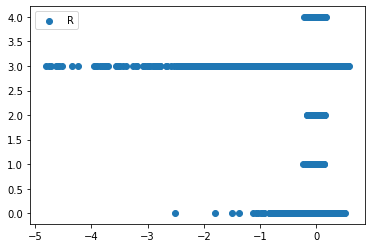

In [307]:
# 데이터의 분포를 확인합니다.
plt.scatter(DF_Kimm['Kimm'],DF_Kimm['Target'],label='R')
plt.legend()

In [309]:
# 랜덤하게 Train, Validation 데이터를 7:3 비율로 나눕니다.

X_df = DF_Kimm.drop(['Target','Label_bearing','Label_belt','Label_misalignment','Label_unbalance','op_or_no'],axis=1)
y_df = DF_Kimm['Target']
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.3)

# random forest를 이용해 모델링합니다
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_val)
accuracy = accuracy_score(y_val , pred)

## Kimm(유선진동) 테스트

In [351]:
Kimm_test=Kimm_test.dropna().reset_index(drop=True)
pred = rf_clf.predict(Kimm_test.drop(['File_name'],axis=1))
Kimm_test['Target']=pd.DataFrame(pred)
Kimm_test.head(2)

,value,kw,File_name,Target
0,0.072470,15.0,001,3
1,0.148405,15.0,001,3


In [352]:
for n in np.delete(Kimm_test['File_name'].unique(),4):
    print(n, le.inverse_transform([Kimm_test[Kimm_test['File_name']==n]['Target'].mode()]))

001 ['normal']
002 ['normal']
007 ['normal']
009 ['normal']
016 ['normal']
018 ['normal']
020 ['normal']
023 ['normal']
024 ['normal']
026 ['normal']
029 ['normal']
041 ['normal']
043 ['normal']
044 ['normal']
049 ['normal']
053 ['normal']
054 ['normal']
057 ['normal']
062 ['normal']
069 ['normal']
072 ['normal']
074 ['belt']
077 ['normal']
079 ['normal']
084 ['normal']
085 ['normal']
086 ['normal']
099 ['normal']
100 ['normal']
106 ['normal']
120 ['normal']
122 ['normal']
123 ['normal']
125 ['normal']
128 ['normal']
130 ['normal']
132 ['normal']
133 ['normal']
134 ['normal']
141 ['normal']
144 ['normal']
149 ['normal']


In [325]:
Kimm_test[Kimm_test['File_name']=='016']['Target'].value_counts() # unblance와 belt값이 일치하므로, 맨 위의 값(unbalance)으로 지정

4    22
2    22
3    13
1     3
Name: Target, dtype: int64

## Vibration(무선진동) 데이터 전처리

In [333]:
# 각 label 명을 지정합니다.
DF_vibea['Label']='bearing'
DF_vibel['Label']='belt'
DF_vimis['Label']='misalignment'
DF_viunb['Label']='unbalance'

# label 별로 나뉘어져 있는 데이터 프레임을 하나의 DF_Vibraion 프레임으로 합칩니다.
DF_Vibration = pd.concat([DF_vibea,DF_vibel,DF_vimis,DF_viunb]).reset_index(drop=True)
#타겟값(목표값)을 형성합니다.
DF_Vibration['Target']=DF_Vibration['Label']
DF_Vibration.loc[(DF_Vibration.op_or_no=='op'),'Target']='normal'

In [334]:
# label값, op_or_no값에 대해 인코딩을 합니다. 또한 목표값이 될 label값을 Target으로 지정합니다.
le = le.fit(DF_Vibration['op_or_no'])
DF_Vibration['op_or_no'] = le.transform(DF_Vibration['op_or_no'])

le = le.fit(DF_Vibration['Target'])
DF_Vibration['Target'] = le.transform(DF_Vibration['Target'])

DF_Vibration=pd.get_dummies(DF_Vibration)

In [335]:
# 인코딩한 label값이 각각 무엇을 의미하는지 확인합니다.
le.inverse_transform([0,1,2,3,4])

array(['bearing', 'belt', 'misalignment', 'normal', 'unbalance'],
      dtype=object)

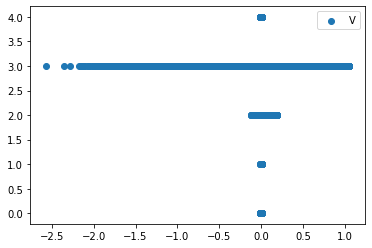

In [336]:
# 데이터의 분포를 확인합니다.
plt.scatter(DF_Vibration['Vibration'],DF_Vibration['Target'],label='V')
plt.legend()

In [339]:
# 랜덤하게 Train, Validation 데이터를 7:3 비율로 나눕니다.
X_df = DF_Vibration.drop(['Target','Label_bearing','Label_belt','Label_misalignment','Label_unbalance','op_or_no'],axis=1)
y_df = DF_Vibration['Target']
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.3)

In [340]:
# 랜덤 포레스트 
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_val)
accuracy = accuracy_score(y_val , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9934


## Vibration(무선진동) 테스트

In [372]:
Vibration_test=Vibration_test.dropna().reset_index(drop=True)
pred = rf_clf.predict(Vibration_test.drop(['File_name'],axis=1))
Vibration_test['Target']=pd.DataFrame(pred)
Vibration_test.head(2)

,value,kw,File_name,Target
0,0.001162,7.5,003,4
1,0.001894,7.5,003,4


In [373]:
for i,n in zip(range(0,len(Vibration_test['File_name'].unique())),Vibration_test['File_name'].unique()):
    print(n, le.inverse_transform([Vibration_test[Vibration_test['File_name']==n]['Target'].mode()]))

003 ['unbalance']
005 ['bearing']
008 ['bearing']
010 ['belt']
012 ['belt']
014 ['misalignment']
015 ['bearing']
019 ['bearing']
021 ['belt']
025 ['unbalance']
027 ['unbalance']
028 ['misalignment']
030 ['unbalance']
032 ['unbalance']
033 ['bearing']
036 ['normal']
038 ['misalignment']
039 ['normal']
045 ['bearing']
046 ['normal']
048 ['bearing']
051 ['belt']
052 ['misalignment']
056 ['unbalance']
058 ['misalignment']
059 ['unbalance']
063 ['unbalance']
064 ['belt']
066 ['normal']
070 ['belt']
071 ['unbalance']
073 ['bearing']
082 ['belt']
083 ['unbalance']
088 ['belt']
090 ['belt']
091 ['bearing']
092 ['misalignment']
094 ['belt']
096 ['unbalance']
102 ['normal']
104 ['normal']
108 ['normal']
113 ['normal']
114 ['normal']
117 ['normal']
119 ['normal']
127 ['normal']
129 ['normal']
131 ['normal']
135 ['normal']
137 ['normal']
140 ['misalignment']
143 ['normal']
148 ['normal']


## null값 처리

In [379]:
#빈 값의 경우, 최빈값 활용

print(DF_Kimm[DF_Kimm['kw']==3.7]['Target'].value_counts()) 
print(DF_Vibration[DF_Vibration['kw']==2.2]['Target'].value_counts())
print(DF_Current[DF_Current['kw']==5.5]['Target'].value_counts())

3    216000
4     72000
2     72000
0     72000
Name: Target, dtype: int64
3    180000
1     72000
4     36000
2     36000
0     36000
Name: Target, dtype: int64
3    144000
4     36000
2     36000
1     36000
0     36000
Name: Target, dtype: int64
